## Multi Armed Bandits Simulation
In this assignment you will simulate multi-armed bandits with different behaviours using numpy, there are a total of 3 different behaviours:
- One with probabilistic behaviour, which gives different outputs with a probability
- One which gives you a noisy reward, for each input

Note : All the rewards (or mean rewards) should be randomly generated and should not be hardcoded

In [1]:
# Import necessary libraries here
import numpy as np
import matplotlib.pyplot as plt

The probabilistic behaviour means for each of the arms there will be a randomly generated set of rewards, {r_1, r_2, ..., r_k} and randomly generated set of probabilities {p_1, p_2, ..., p_k}. After pulling any arm, you should choose one of the rewards in its reward set with its corresponding probability and return it. The choice of value of k is upto you, but you will need numpy for k > 2.

In [2]:
class MAB_probabilistic:
    def __init__(self, num_action : int = 10) -> None:
        # I choose k=10
        self.k=10
        rewards = np.random.rand(num_action*self.k) # because each action has k possible rewards (will be reshaped into 2D array)
        probabilities = np.random.rand(num_action*self.k) # because each reward must have an associated probability
        self.rewards = rewards.reshape((num_action, -1)) # each row lists rewards for a particular action
        self.probabilities = probabilities.reshape((num_action, -1)) # to align probabilities with rewards
        for i, row in enumerate(self.probabilities):
            self.probabilities[i] /= row.sum() # to ensure that probabilities for an action add up to one
            

    def act(self, action : int) -> float:
        # generating a random number in [0,1) to simulate the 'probability'
        random_number = np.random.rand()
        # calculating cumulative sum of probabilities for a given action, useful for finding which action to return
        cumulative = np.cumsum(self.probabilities[action])

        for index in range(self.k):
            if random_number <= cumulative[index]:
                return self.rewards[action][index]

The noisy policy means for each arm, you should return a reward chosen from an underlying probability distribution (like gaussian, you can use numpy for this purpose) with a randomly generated mean and the given variance (passed to \_\_init\_\_)

In [3]:
class MAB_noisy:
    def __init__(self, noise_variance : float, num_action : int = 10) -> None:
        self.means = np.random.rand(num_action) # here mean lies in [0,1), modify if that was not the intention
        self.variance = noise_variance


    def act(self, action : int) -> float:
        return np.random.normal(loc=self.means[action], scale=np.sqrt(self.variance), size=1)[0]

Initialize MAB_probabilistic with number of actions 5.
Perform an action for a fixed number of time and plot the average of first n rewards against n. Make such graphs for all 5 actions in single plot.

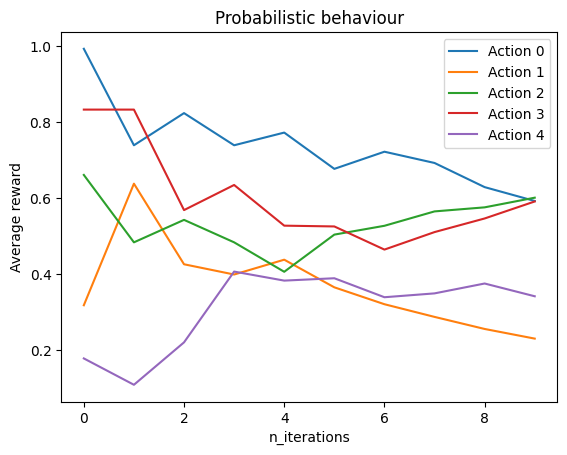

In [4]:
n_actions = 5 # number of actions
probabilistic_bandit = MAB_probabilistic(n_actions)
n_times = 10 # number of times each action is performed
plt.title("Probabilistic behaviour")
plt.xlabel("n_iterations")
plt.ylabel("Average reward")
for action in range(n_actions):
    rewards = np.zeros(n_times) # an array to store rewards of all iterations of a given action
    for i in range(n_times):
        rewards[i] = probabilistic_bandit.act(action)
    rewards = np.cumsum(rewards)
    for j in range(n_times):
        rewards[j] /= (j+1)
    plt.plot(rewards, label=f'Action {action}')
plt.legend()
plt.show()

Initialize MAB_noisy with number of actions 5.
Perform an action for a fixed number of time and plot the nth rewards against n. Make such graphs for all 5 actions in single plot.

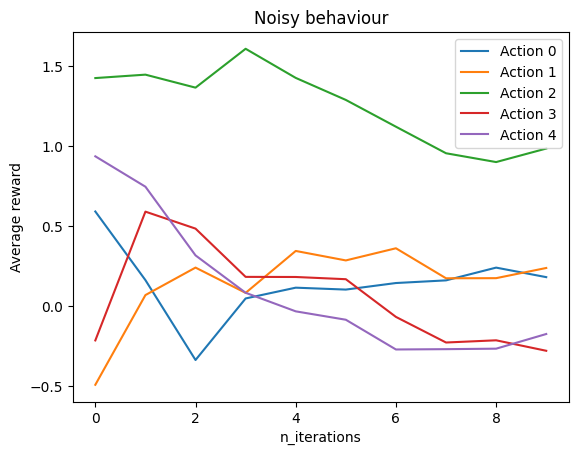

In [5]:
n_actions = 5 # number of actions
noisy_bandit = MAB_noisy(noise_variance=1, num_action=n_actions)
n_times = 10 # number of times each action is performed
plt.title("Noisy behaviour")
plt.xlabel("n_iterations")
plt.ylabel("Average reward")
for action in range(n_actions):
    rewards = np.zeros(n_times) # an array to store rewards of all iterations of a given action
    for i in range(n_times):
        rewards[i] = noisy_bandit.act(action)
    rewards = np.cumsum(rewards)
    for j in range(n_times):
        rewards[j] /= (j+1)
    plt.plot(rewards, label=f'Action {action}')
plt.legend()
plt.show()

Optional : Initialize any one of the above classes and find the optimal action, you can only use act() function and cannot access any class variables. Please do not search for methods on google or anywhere else, this is just a simple exercise for your own thinking.

In [6]:
# I am initialising the MAB_noisy class.
# My method to find optimal action: execute each action a large number of times, and find average returns for each
# Since sample mean tends to true mean for large number of trials,
# the action with the largest average reward is the optimal one.

n_trials = 500 # some large number
n_actions = 5
variance = 1 # variance supplied to noisy behaviour
optimal_noisy_bandit = MAB_noisy(variance, n_actions)
returns = np.zeros(n_actions) # returns of the actions
for trial in range(n_trials):
    for action in range(n_actions):
        returns[action] += optimal_noisy_bandit.act(action)
    if (trial+1)%100 == 0:
        optimal_action = np.argmax(returns)
        print(f'In {trial+1} trials, optimal action = {optimal_action}')
print("\n")
optimal_action = np.argmax(returns)
print(f'Thus, the optimal action is action number {optimal_action}')

In 100 trials, optimal action = 3
In 200 trials, optimal action = 3
In 300 trials, optimal action = 3
In 400 trials, optimal action = 3
In 500 trials, optimal action = 3


Thus, the optimal action is action number 3
